# Load all notebooks with Functions

In [2]:
%run /Users/pnl0rc8b@emea.royalahold.net/Functions_Rebuild

In [3]:
%run /Users/pnl0rc8b@emea.royalahold.net/Functions_Formateren

# Configure Parameters

In [5]:
# PARAMETERS

ATTRIBUUT = "ndFiberIndex" # Selecteer Attribuut om te TRAINEN                                              ndTypeOfGrain       ndAnimalSpecies
SAVE_MODEL = False #True # Wil je een oud model overschrijven met een nieuwe?
EPOCHS = 100
Classes_threshold = 11
Overig_threshold = 300 # Class beneden deze threshold, zal worden toegevoegd aan class: 'overig'
Upsample_size = 8000
Upsample_size_validation = 2300
numerieke_features = ['FIBER','FIBER_was_missing','Fiber_UOM_class','PROTEINE'] # Deze numerieke features nemen we mee in het trainingsprocess, leeg is ook mogelijk --> []

balance_threshold_single_label = 500
upsample_single_label = 2000

# Indien andere numeriek features dan -> nutrienten is gewenst, zie dan:
# 'Functions_Rebuild -> Tables' voeg hier de extra Table dan toe

# Training Process loop

Amount of rows: (33184, 'Amount of columns: ', 134)
ATTRIBUUT: ndFiberIndex
{'EMPTY': 23250, 'Laag': 7305, 'Middel': 1442, 'Hoog': 1187}

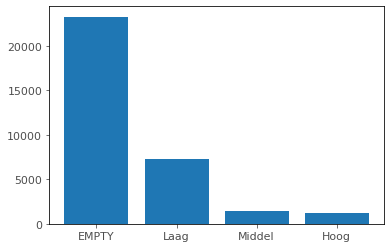

null entries = 0
Shape van dataframe: (23426, 29)
null entries = 1646
<BarContainer object of 9 artists> <class 'matplotlib.container.BarContainer'>

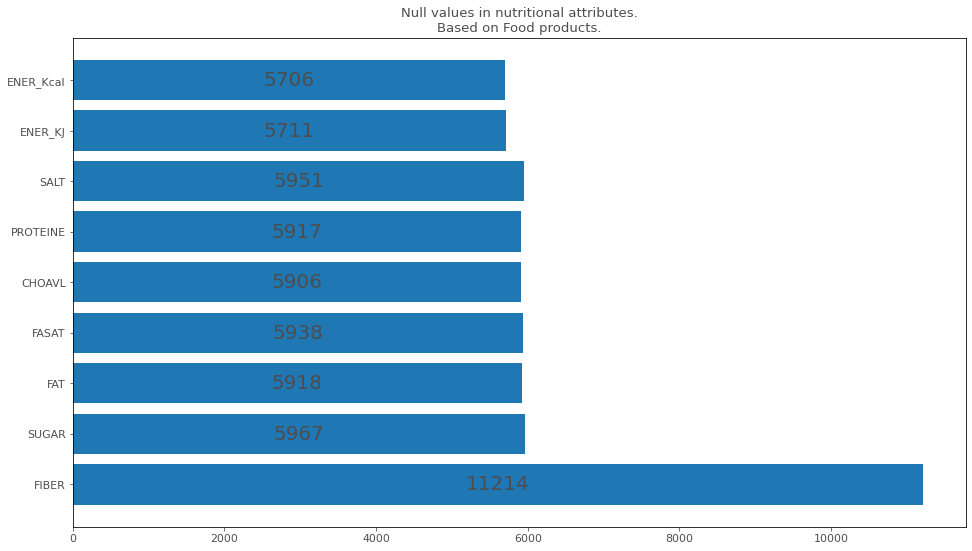

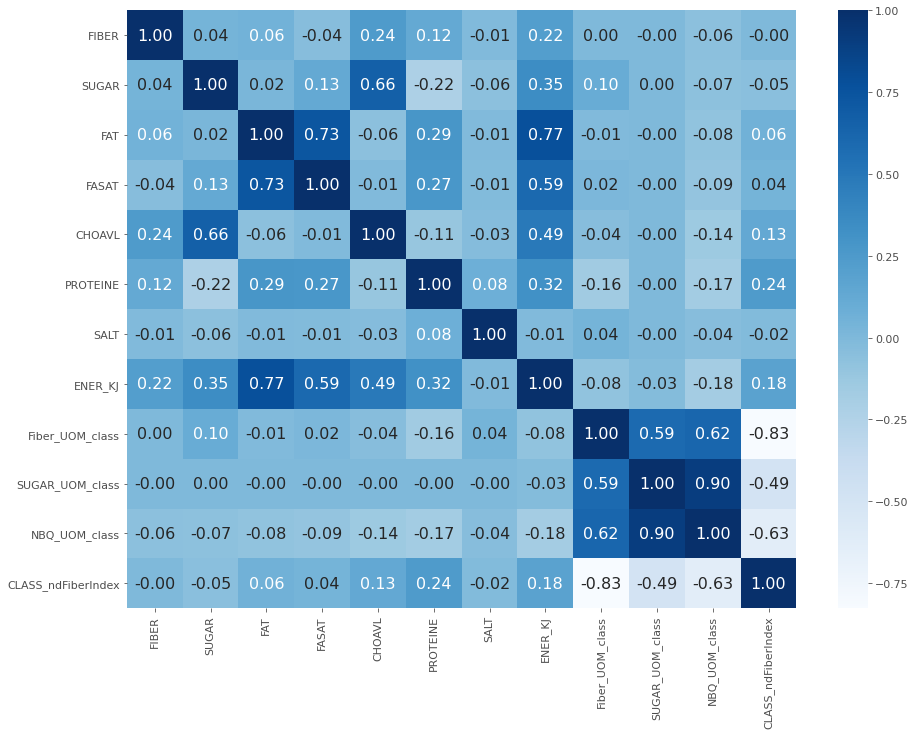

Vocab size: 41228.0
Vocabular size: 41228.0
Numerical Features: Index(['FIBER', 'FIBER_was_missing', 'Fiber_UOM_class', 'PROTEINE'], dtype='object')
Shape Numerical Features: (21780, 4)
Shape Text Features: (21780, 301)
Shape Targets: (21780, 4)
<command-260378592162316>:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
 X_train = np.array(list(zip(X_train_num, X_train_text)))
(15246, 2) (3267, 2) (3267, 2)
(15246, 4) (3267, 4) (3267, 4)

In [7]:
# Formateer
nd_controle = koppel_ndAttributen()
df_geformateerd, multi_label_flag,classes_available = create_overige_class(nd_controle, ATTRIBUUT,Classes_threshold, Overig_threshold)

DF_merged = koppel_preprocessed_text(df_geformateerd)
DF_merged = fix_empty_fields(DF_merged, ATTRIBUUT)
DF_merged = Correlation_matrix(DF_merged, ATTRIBUUT, show_nan_plot=True)

#Prepare for trainimg
vocab_size = get_vocabulary_size(DF_merged)

if multi_label_flag == True:
    X_train, X_val, X_test, y_train, y_val, y_test, targets = total_split(DF_merged, numerieke_features, ATTRIBUUT)
else:
    DF_merged = imbalance_check_single_label(classes_available, DF_merged, upsample_single_label)
    ytrain, yval, ytest, Xtrain_num, Xtrain_text, Xval_num, Xval_text, Xtest_num, Xtest_text = single_prep(numerieke_features, DF_merged, ATTRIBUUT)

In [8]:
if multi_label_flag == True:
    classes = DF_merged['overig'].value_counts().index.tolist() # haal [0,1] en [1,0] als class eruit
    X_train, y_train = balance_multi_label(targets, y_train, X_train, classes, Upsample_size) # Balance each sub-class
    X_val, y_val = balance_multi_label(targets, y_val, X_val, classes, Upsample_size_validation) # Balance each sub-class
    train_accuracies, val_accuracies, class_names, model = TRAINING_multi_label(X_train, X_val, X_test, y_train, y_val, y_test, numerieke_features, vocab_size, ATTRIBUUT, SAVE_MODEL) # Start training the model --> Multi label
else:
    model, model_history = TRAINING_single_label(Xtrain_num, Xtrain_text, Xval_num, Xval_text, Xtest_num, Xtest_text, vocab_size, EPOCHS, SAVE_MODEL)


**************** SINGLE LABEL MODEL ***************

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type) Output Shape Param # Connected to 
==================================================================================================
 input_8 (InputLayer) [(None, 301)] 0 [] 
 
 embedding_2 (Embedding) (None, 301, 4) 164912 ['input_8[0][0]'] 
 
 flatten_2 (Flatten) (None, 1204) 0 ['embedding_2[1][0]'] 
 
 dropout_7 (Dropout) (None, 1204) 0 ['flatten_2[1][0]'] 
 
 input_9 (InputLayer) [(None, 4)] 0 [] 
 
 concatenate_2 (Concatenate) (None, 1208) 0 ['dropout_7[1][0]', 
 'input_9[0][0]'] 
 
 dense_8 (Dense) (None, 30) 36270 ['concatenate_2[1][0]'] 
 
 dense_9 (Dense) (None, 50) 1550 ['dense_8[1][0]'] 
 
 dense_10 (Dense) (None, 20) 1020 ['dense_9[1][0]'] 
 
 dropout_8 (Dropout) (None, 20) 0 ['dense_10[1][0]'] 
 
 dense_11 (Dense) (None, 4) 84 ['dropout_8[1][0]'] 
 
==================================================================================================
Total params: 203,836
Trainable params: 203,836
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/100
477/477 - 2s - loss: 0.6655 - accuracy: 0.7356 - val_loss: 0.3177 - val_accuracy: 0.8561 - 2s/epoch - 4ms/step
Epoch 2/100
477/477 - 1s - loss: 0.3295 - accuracy: 0.8666 - val_loss: 0.2316 - val_accuracy: 0.8932 - 1s/epoch - 3ms/step
Epoch 3/100
477/477 - 1s - loss: 0.2645 - accuracy: 0.8979 - val_loss: 0.2022 - val_accuracy: 0.9268 - 1s/epoch - 3ms/step
Epoch 4/100
477/477 - 1s - loss: 0.2411 - accuracy: 0.9099 - val_loss: 0.1877 - val_accuracy: 0.9293 - 1s/epoch - 3ms/step
Epoch 5/100
477/477 - 1s - loss: 0.2257 - accuracy: 0.9147 - val_loss: 0.1772 - val_accuracy: 0.9379 - 1s/epoch - 3ms/step
Epoch 6/100
477/477 - 1s - loss: 0.2115 - accuracy: 0.9258 - val_loss: 0.1689 - val_accuracy: 0.9425 - 1s/epoch - 3ms/step
Epoch 7/100
477/477 - 1s - loss: 0.2073 - accuracy: 0.9223 - val_loss: 0.1608 - val_accuracy: 0.9492 - 1s/epoch - 3ms/step
Epoch 8/100
477/477 - 1s - loss: 0.2027 - accuracy: 0.9263 - val_loss: 0.1800 - val_accuracy: 0.9290 - 1s/epoch - 3ms/step
Epoch 9/100
477/477 - 1s - loss: 0.1999 - accuracy: 0.9293 - val_loss: 0.1673 - val_accuracy: 0.9345 - 1s/epoch - 3ms/step
Epoch 10/100
477/477 - 1s - loss: 0.1955 - accuracy: 0.9290 - val_loss: 0.1529 - val_accuracy: 0.9513 - 1s/epoch - 3ms/step
Epoch 11/100
477/477 - 1s - loss: 0.1895 - accuracy: 0.9317 - val_loss: 0.1589 - val_accuracy: 0.9339 - 1s/epoch - 3ms/step
Epoch 12/100
477/477 - 1s - loss: 0.1868 - accuracy: 0.9334 - val_loss: 0.1492 - val_accuracy: 0.9452 - 1s/epoch - 3ms/step
Epoch 13/100
477/477 - 1s - loss: 0.1847 - accuracy: 0.9333 - val_loss: 0.1487 - val_accuracy: 0.9382 - 1s/epoch - 3ms/step
Epoch 14/100
477/477 - 1s - loss: 0.1864 - accuracy: 0.9320 - val_loss: 0.1474 - val_accuracy: 0.9385 - 1s/epoch - 3ms/step
Epoch 15/100
477/477 - 1s - loss: 0.1802 - accuracy: 0.9353 - val_loss: 0.1435 - val_accuracy: 0.9507 - 1s/epoch - 3ms/step
Epoch 16/100
477/477 - 1s - loss: 0.1806 - accuracy: 0.9334 - val_loss: 0.1515 - val_accuracy: 0.9382 - 1s/epoch - 3ms/step
Epoch 17/100
477/477 - 1s - loss: 0.1778 - accuracy: 0.9350 - val_loss: 0.1384 - val_accuracy: 0.9535 - 1s/epoch - 3ms/step
Epoch 18/100
477/477 - 1s - loss: 0.1736 - accuracy: 0.9383 - val_loss: 0.1850 - val_accuracy: 0.9207 - 1s/epoch - 3ms/step
Epoch 19/100
477/477 - 1s - loss: 0.1740 - accuracy: 0.9395 - val_loss: 0.1411 - val_accuracy: 0.9446 - 1s/epoch - 3ms/step
Epoch 20/100
477/477 - 1s - loss: 0.1685 - accuracy: 0.9382 - val_loss: 0.1529 - val_accuracy: 0.9467 - 1s/epoch - 3ms/step
Epoch 21/100
477/477 - 1s - loss: 0.1726 - accuracy: 0.9388 - val_loss: 0.1348 - val_accuracy: 0.9467 - 1s/epoch - 3ms/step
Epoch 22/100
477/477 - 1s - loss: 0.1664 - accuracy: 0.9395 - val_loss: 0.1306 - val_accuracy: 0.9458 - 1s/epoch - 3ms/step
Epoch 23/100
477/477 - 1s - loss: 0.1655 - accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
 1/103 [..............................] - ETA: 7s 42/103 [===========>..................] - ETA: 0s 82/103 [======================>.......] - ETA: 0s103/103 [==============================] - 0s 1ms/step
 1/103 [..............................] - ETA: 2s - loss: 0.0295 - accuracy: 1.0000 37/103 [=========>....................] - ETA: 0s - loss: 0.0807 - accuracy: 0.9747 76/103 [=====================>........] - ETA: 0s - loss: 0.0855 - accuracy: 0.9749103/103 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 0.9749
unique amount of classes: 4 [1, 0, 0, 0]

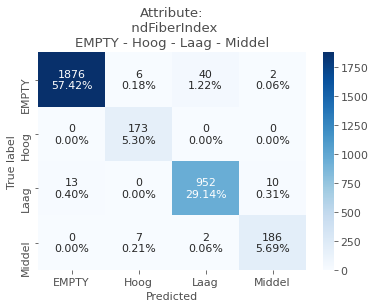

Confusion Matrix:
**************************
 [[1876 6 40 2]
 [ 0 173 0 0]
 [ 13 0 952 10]
 [ 0 7 2 186]] 
**************************

Accuracy: 97.551270278543
Classification report: precision recall f1-score support

 0 0.99 0.98 0.98 1924
 1 0.93 1.00 0.96 173
 2 0.96 0.98 0.97 975
 3 0.94 0.95 0.95 195

 accuracy 0.98 3267
 macro avg 0.96 0.98 0.97 3267
weighted avg 0.98 0.98 0.98 3267

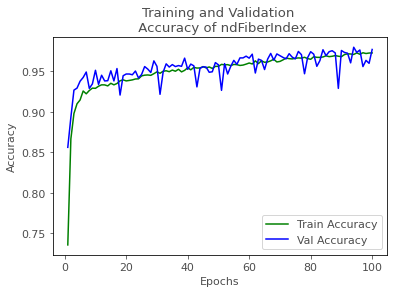

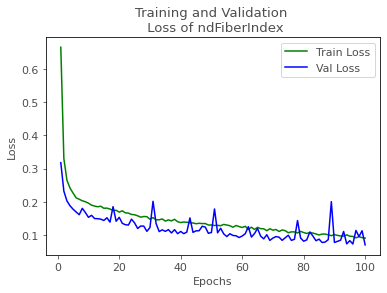

In [9]:
# Plot statistieken van de training fase
if multi_label_flag == True:
    plot_multiple_training(train_accuracies, val_accuracies, class_names, ATTRIBUUT)
else:
    plot_single_label_training(model, model_history, Xtest_num, Xtest_text, ytest, ATTRIBUUT, DF_merged)
    